In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import rdBase,Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem, Descriptors
import seaborn as sns
%matplotlib inline
from rdkit.ML.Descriptors import MoleculeDescriptors

In [2]:
descriptor = pd.read_pickle('.\Input\\rdkit_descriptors(208).pkl')

In [3]:
descriptor

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,6.500000,3.500000,6.500000,3.500000,0.369797,27.025999,26.018000,27.010899,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.319445,1.430556,7.319445,1.430556,0.386981,41.053001,38.028999,41.026550,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.388889,1.458333,7.388889,1.458333,0.358919,51.048000,50.040001,51.010899,18.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.263889,1.236111,7.263889,1.236111,0.390104,52.035999,52.035999,52.006149,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.625000,0.625000,7.625000,0.625000,0.403814,55.080002,50.040001,55.042198,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,2.762732,0.972222,2.762732,0.972222,0.414886,119.167000,110.095001,119.073502,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14198,2.818287,0.972222,2.818287,0.972222,0.418585,119.167000,110.095001,119.073502,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14199,2.854167,0.879630,2.854167,0.879630,0.447559,119.167000,110.095001,119.073502,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14200,2.721065,0.898148,2.721065,0.898148,0.382870,120.154999,112.091003,120.068748,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x = descriptor

In [6]:
#方差阈值特征选择
from sklearn.feature_selection import VarianceThreshold
variances = x.var()
threshold = 0.01

vt = VarianceThreshold(threshold=threshold)
x_selected = vt.fit_transform(x)

select_name_index = vt.get_support(indices=True)
select_name = x.columns[select_name_index]


for feature_name, variance in zip(x.columns, variances):
    if feature_name not in select_name:
        print("Feature Name:", feature_name)
        print("Variance:", variance)
x_var = pd.DataFrame(x_selected, columns=select_name)

Feature Name: qed
Variance: 0.005280040670186281
Feature Name: NumRadicalElectrons
Variance: 0.0
Feature Name: MaxPartialCharge
Variance: 0.003106364281848073
Feature Name: MinPartialCharge
Variance: 0.002650963608175516
Feature Name: MaxAbsPartialCharge
Variance: 0.0026232583913952112
Feature Name: MinAbsPartialCharge
Variance: 0.003057473571971059
Feature Name: PEOE_VSA14
Variance: 0.007055158261209726
Feature Name: SMR_VSA8
Variance: 0.0
Feature Name: SlogP_VSA11
Variance: 0.0
Feature Name: SlogP_VSA12
Variance: 0.0
Feature Name: SlogP_VSA7
Variance: 0.0
Feature Name: SlogP_VSA9
Variance: 0.0
Feature Name: EState_VSA10
Variance: 0.0
Feature Name: EState_VSA11
Variance: 0.0
Feature Name: VSA_EState10
Variance: 0.0
Feature Name: NumAromaticCarbocycles
Variance: 0.003927567508071661
Feature Name: fr_Al_COO
Variance: 0.0
Feature Name: fr_Al_OH
Variance: 0.0
Feature Name: fr_Al_OH_noTert
Variance: 0.0
Feature Name: fr_Ar_COO
Variance: 0.0
Feature Name: fr_Ar_OH
Variance: 0.0
Feature Name

In [7]:
x= x_var
y = pd.read_pickle('.\Input\\EnergyGap.pkl')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(x_train,y_train.ravel())

C:\Users\jyh\AppData\Local\Temp\ipykernel_14848\1362040609.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rfr.fit(x_train,y_train.ravel())


RandomForestRegressor(random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import time
y_train_pred = rfr.predict(x_train)
y_test_pred = rfr.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("train R2:", r2_train)
print("test R2:", r2_test)
print("train MAE:", mae_train)
print("test MAE:", mae_test)

train R2: 0.9924526974863147
test R2: 0.9504665796592318
train MAE: 0.002533178610400765
test MAE: 0.0067622164456027575


In [10]:
features = x.columns
feature_importances = rfr.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

In [11]:
features_df

,Features,Importance
59,SMR_VSA7,0.410052
88,FractionCSP3,0.118002
53,SMR_VSA10,0.056262
20,BertzCT,0.044706
67,SlogP_VSA6,0.041187
...,...,...
113,fr_NH2,0.000036
123,fr_nitrile,0.000035
43,PEOE_VSA13,0.000023
127,fr_term_acetylene,0.000019


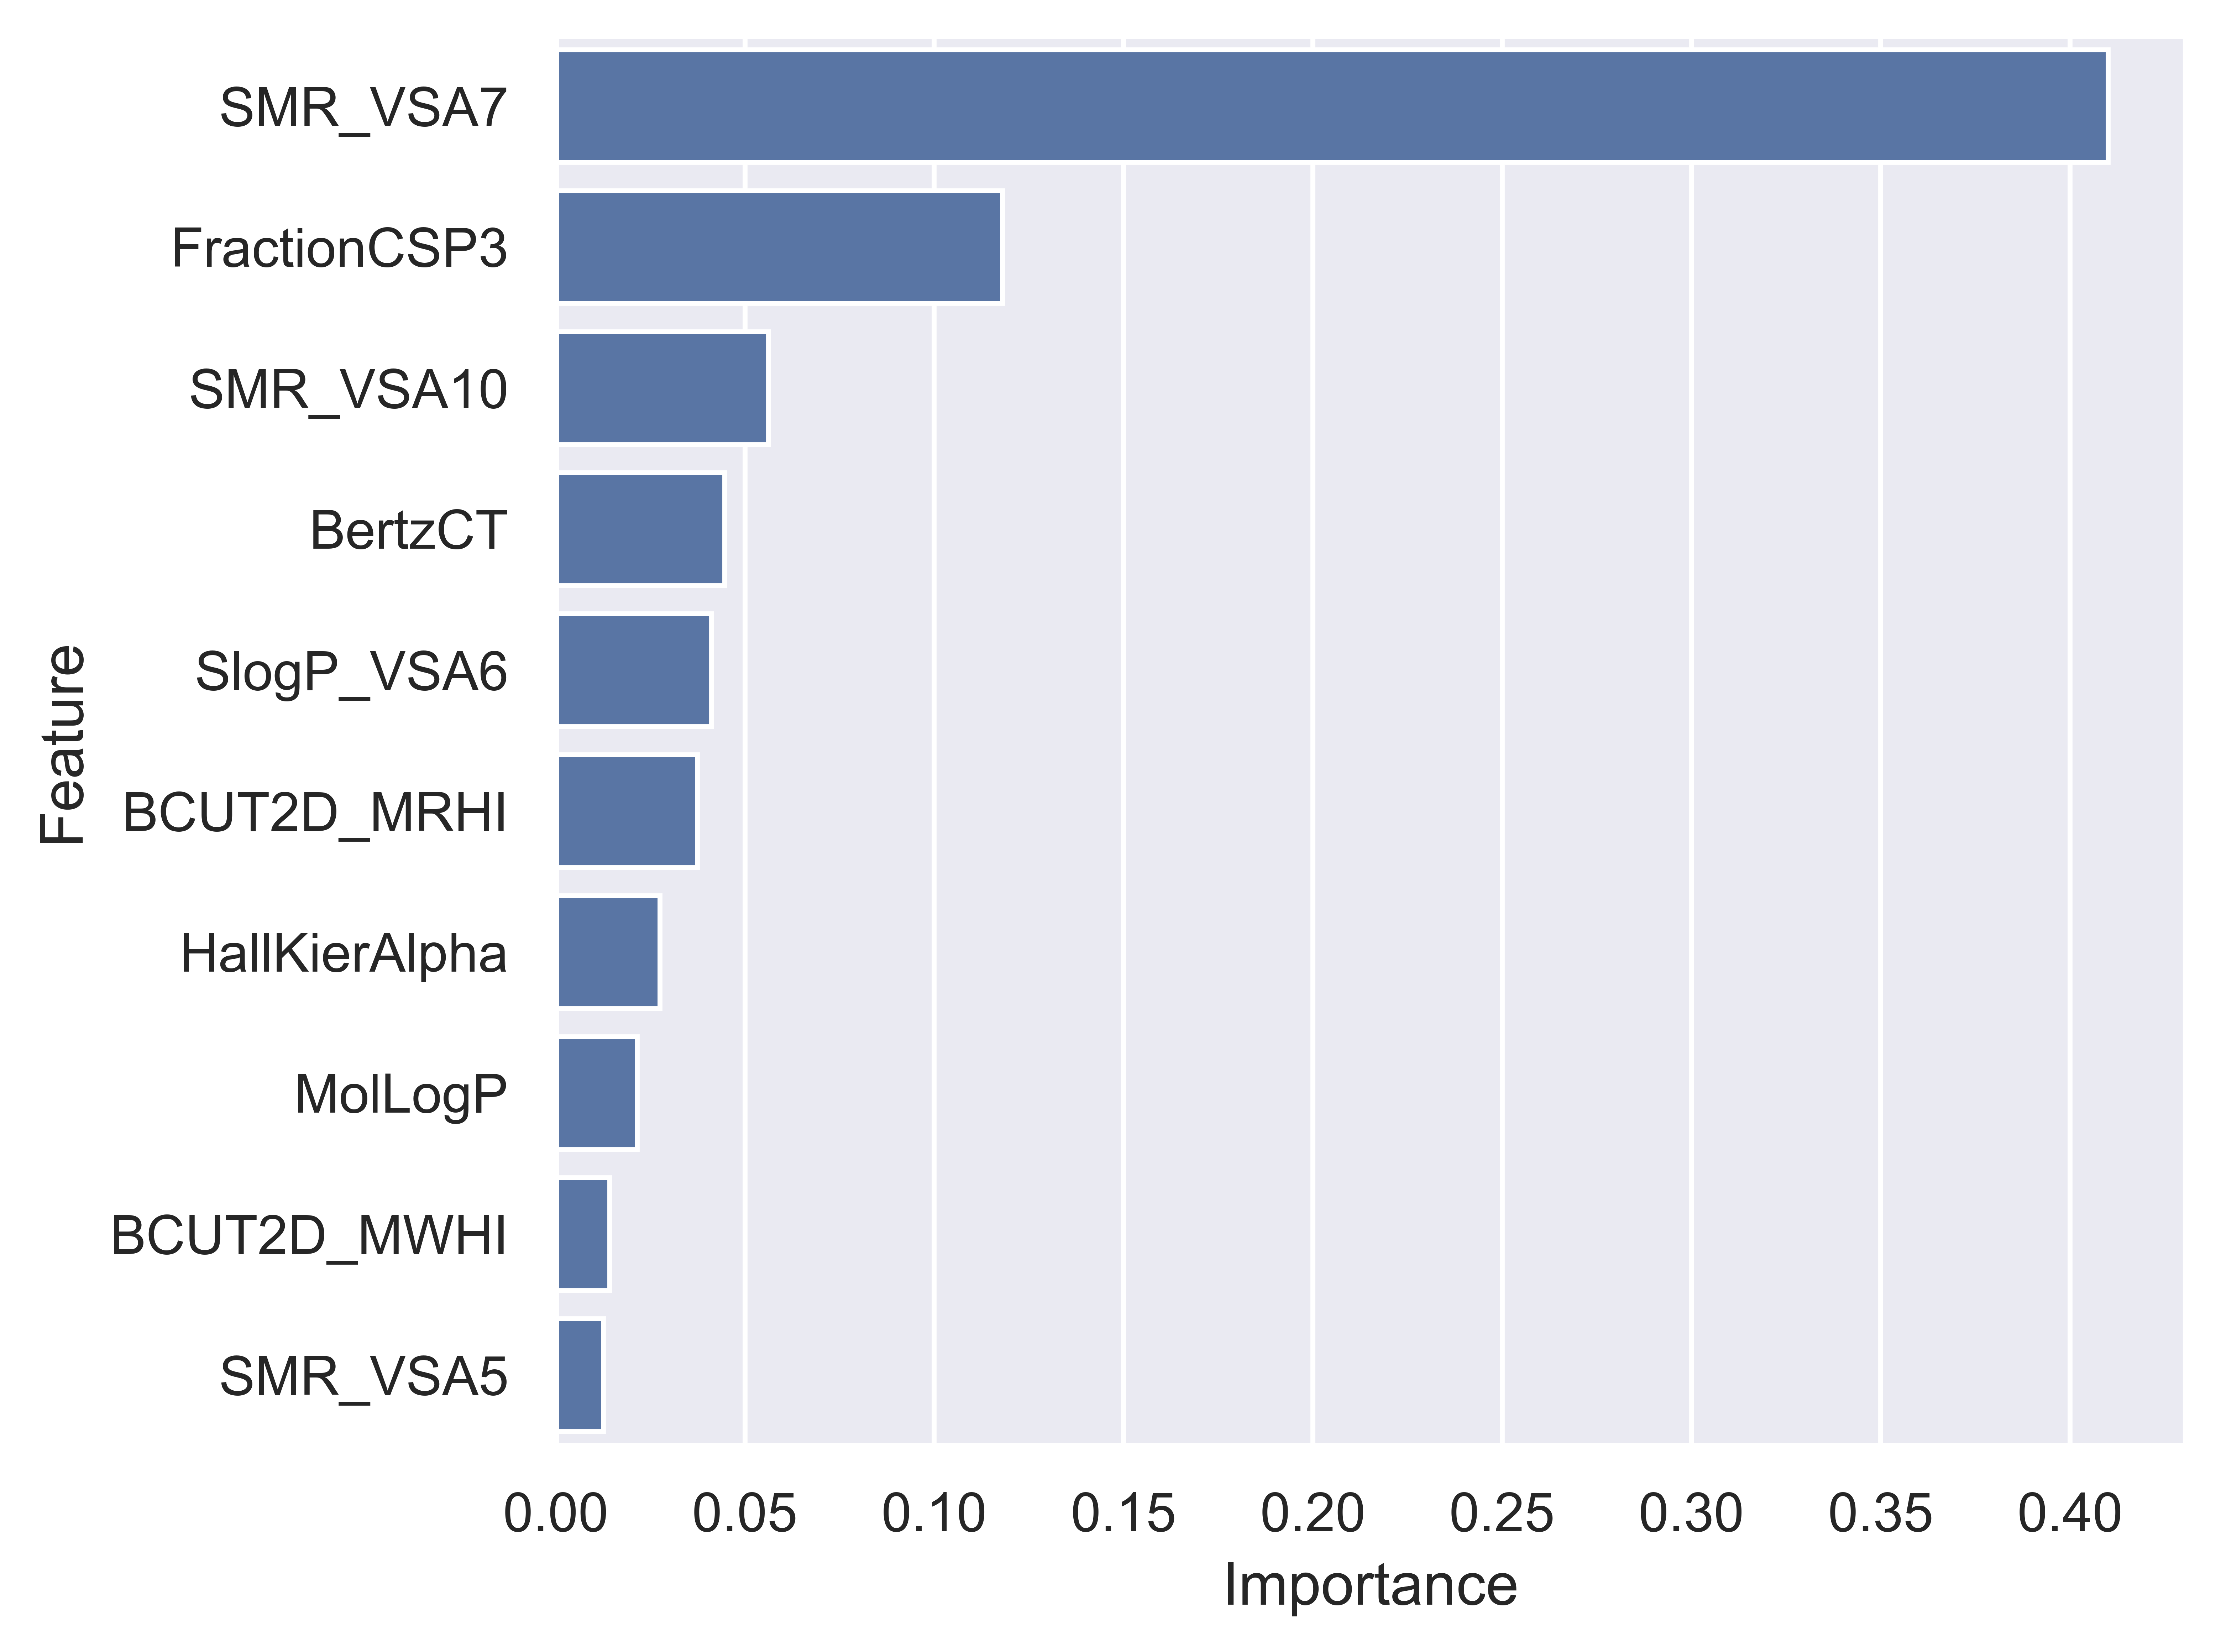

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi=1000)
sns.set(rc={"figure.figsize": (10, 4)})

sns.barplot(x=features_df['Importance'][:10], y=features_df['Features'][:10])


plt.ylabel('Feature', fontweight='normal')

plt.tight_layout()



plt.show()

In [13]:
features_df

,Features,Importance
59,SMR_VSA7,0.410052
88,FractionCSP3,0.118002
53,SMR_VSA10,0.056262
20,BertzCT,0.044706
67,SlogP_VSA6,0.041187
...,...,...
113,fr_NH2,0.000036
123,fr_nitrile,0.000035
43,PEOE_VSA13,0.000023
127,fr_term_acetylene,0.000019


In [23]:
selected_columns = ['SMR_VSA7', 'FractionCSP3', 'SMR_VSA10', 'BertzCT', 'SlogP_VSA6', 
                   'BCUT2D_MRHI', 'HallKierAlpha', 'MolLogP', 'BCUT2D_MWHI', 'SMR_VSA5',
                   'BalabanJ', 'BCUT2D_LOGPHI', 'PEOE_VSA11', 'BCUT2D_CHGHI', 'SMR_VSA9',
                   'PEOE_VSA2', 'SlogP_VSA2', 'BCUT2D_LOGPLOW', 'VSA_EState2', 'BCUT2D_MWLOW',
                   'VSA_EState4', 'VSA_EState5', 'BCUT2D_MRLOW','Kappa3','fr_piperzine', 'fr_piperdine',
                   'fr_Ar_NH', 'fr_aniline', 'fr_imidazole', 'fr_pyridine']
selected_df = x_var.loc[:, selected_columns]


In [24]:
selected_df 

,SMR_VSA7,FractionCSP3,SMR_VSA10,BertzCT,SlogP_VSA6,BCUT2D_MRHI,HallKierAlpha,MolLogP,BCUT2D_MWHI,SMR_VSA5,...,VSA_EState4,VSA_EState5,BCUT2D_MRLOW,Kappa3,fr_piperzine,fr_piperdine,fr_Ar_NH,fr_aniline,fr_imidazole,fr_pyridine
0,0.0,0.000000,0.0,6.754888,0.0,4.032459,-0.51,0.13978,14.161969,0.000000,...,0.000000,0.000000,1.580541,-4.470784,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.500000,0.0,24.264662,0.0,4.507021,-0.51,0.52988,14.199773,6.923737,...,0.000000,0.000000,1.489653,1.490000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,58.264664,0.0,5.082006,-0.95,0.14318,14.203283,0.000000,...,0.000000,1.736111,1.548351,1.050000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,59.019550,0.0,4.990464,-1.02,0.03356,14.273039,0.000000,...,0.000000,0.000000,1.486913,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.666667,0.0,33.038307,0.0,4.614725,-0.51,0.91998,14.212296,13.344559,...,0.000000,0.000000,1.223013,1.490000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,0.0,1.000000,0.0,228.952194,0.0,5.458899,-0.04,0.31870,15.476138,18.504503,...,0.972222,3.734954,-0.184837,0.122927,0.0,4.0,0.0,0.0,0.0,0.0
14198,0.0,1.000000,0.0,228.952194,0.0,5.467747,-0.04,0.46120,15.509032,30.967165,...,0.972222,2.459491,-0.159833,0.122927,0.0,4.0,0.0,0.0,0.0,0.0
14199,0.0,1.000000,0.0,228.952194,0.0,5.474702,-0.04,0.46120,15.510193,30.464251,...,0.879630,3.699074,-0.191437,0.122927,0.0,3.0,0.0,0.0,0.0,0.0
14200,0.0,1.000000,0.0,231.300705,0.0,5.503773,-0.08,-0.88080,15.648456,24.167364,...,0.898148,0.000000,-0.205947,0.120875,1.0,3.0,0.0,0.0,0.0,0.0


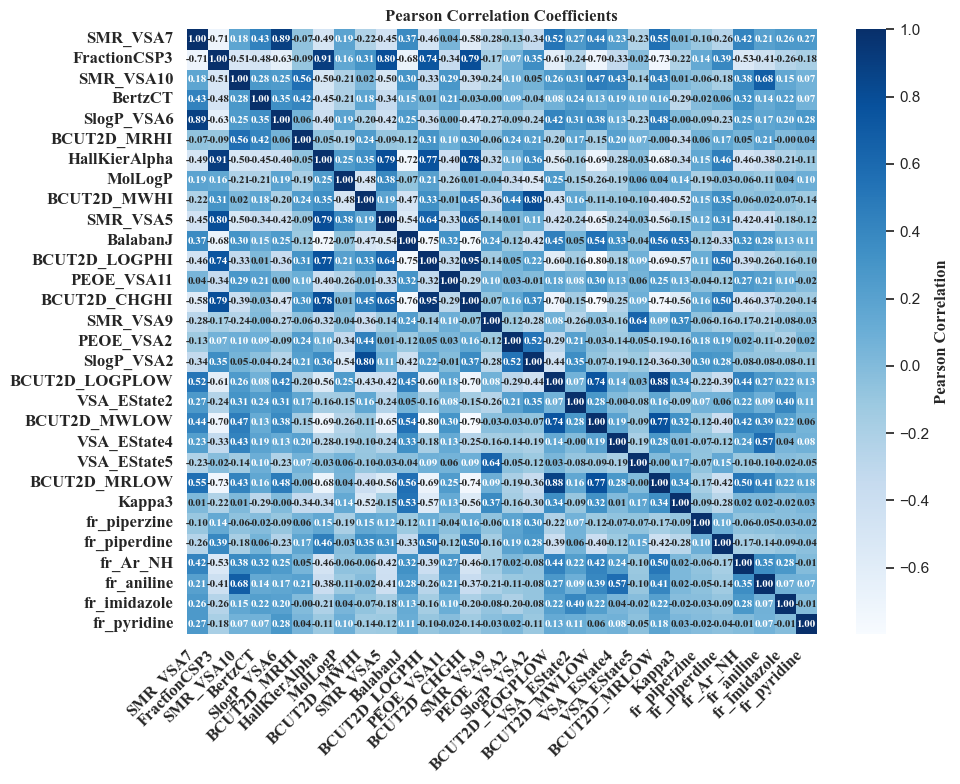

In [25]:
correlation_matrix = selected_df.corr(method='pearson')
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='C:/Windows/Fonts/times.ttf', weight='normal')
bold_font = FontProperties(fname='C:/Windows/Fonts/timesbd.ttf', weight='bold')

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', annot_kws={"size": 8, "fontproperties": bold_font}, cbar_kws={"label": "Pearson Correlation"})
heatmap.set_title('Pearson Correlation Coefficients', fontproperties=bold_font)
cbar = heatmap.collections[0].colorbar
cbar.set_label("Pearson Correlation", fontproperties=bold_font)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontproperties=bold_font)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontproperties=bold_font)
plt.tight_layout() 


plt.show()


In [26]:

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.92:  
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            corr = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((colname_i, colname_j, corr))

for pair in high_corr_pairs:
    feature1 = pair[0]
    feature2 = pair[1]
    correlation = pair[2]
    print(f"Feature Pair: {feature1}, {feature2}, Correlation: {correlation}")


Feature Pair: BCUT2D_CHGHI, BCUT2D_LOGPHI, Correlation: 0.9532548194403874


In [30]:
gap_29= selected_df .drop([ 'BCUT2D_LOGPHI'], axis=1)
gap_29.to_pickle('./Output/gap_29.pkl')
gap_29

,SMR_VSA7,FractionCSP3,SMR_VSA10,BertzCT,SlogP_VSA6,BCUT2D_MRHI,HallKierAlpha,MolLogP,BCUT2D_MWHI,SMR_VSA5,...,VSA_EState4,VSA_EState5,BCUT2D_MRLOW,Kappa3,fr_piperzine,fr_piperdine,fr_Ar_NH,fr_aniline,fr_imidazole,fr_pyridine
0,0.0,0.000000,0.0,6.754888,0.0,4.032459,-0.51,0.13978,14.161969,0.000000,...,0.000000,0.000000,1.580541,-4.470784,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.500000,0.0,24.264662,0.0,4.507021,-0.51,0.52988,14.199773,6.923737,...,0.000000,0.000000,1.489653,1.490000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,58.264664,0.0,5.082006,-0.95,0.14318,14.203283,0.000000,...,0.000000,1.736111,1.548351,1.050000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,59.019550,0.0,4.990464,-1.02,0.03356,14.273039,0.000000,...,0.000000,0.000000,1.486913,0.980000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.666667,0.0,33.038307,0.0,4.614725,-0.51,0.91998,14.212296,13.344559,...,0.000000,0.000000,1.223013,1.490000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14197,0.0,1.000000,0.0,228.952194,0.0,5.458899,-0.04,0.31870,15.476138,18.504503,...,0.972222,3.734954,-0.184837,0.122927,0.0,4.0,0.0,0.0,0.0,0.0
14198,0.0,1.000000,0.0,228.952194,0.0,5.467747,-0.04,0.46120,15.509032,30.967165,...,0.972222,2.459491,-0.159833,0.122927,0.0,4.0,0.0,0.0,0.0,0.0
14199,0.0,1.000000,0.0,228.952194,0.0,5.474702,-0.04,0.46120,15.510193,30.464251,...,0.879630,3.699074,-0.191437,0.122927,0.0,3.0,0.0,0.0,0.0,0.0
14200,0.0,1.000000,0.0,231.300705,0.0,5.503773,-0.08,-0.88080,15.648456,24.167364,...,0.898148,0.000000,-0.205947,0.120875,1.0,3.0,0.0,0.0,0.0,0.0
